In [1]:
from PIL import Image
import requests
from io import BytesIO
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("csv_files/INpreprocessed.csv")

In [3]:
response = requests.get(df.file_path[0])
img = Image.open(BytesIO(response.content))

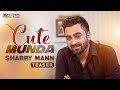

In [4]:
display(img)

In [5]:
np.asarray(img)[0,0]

array([7, 1, 0], dtype=uint8)

In [6]:
np.asarray(img).shape

(90, 120, 3)

In [7]:
def get_rgb(filename):
    img = np.asarray(Image.open(open(filename, 'rb')))
    return img.reshape(-1, 3)

In [8]:
im = get_rgb(df.file_path[0].replace(
        "https://raw.githubusercontent.com/sheelfshah/iitb_ds203_project/master/", ""))
im[0]

array([7, 1, 0], dtype=uint8)

In [9]:
import sklearn
from sklearn.cluster import MiniBatchKMeans

In [10]:
km = MiniBatchKMeans(n_clusters=10, batch_size=90*120)

In [11]:
for i, path in enumerate(df.file_path.sample(frac=1)):
    im = get_rgb(path.replace(
        "https://raw.githubusercontent.com/sheelfshah/iitb_ds203_project/master/", ""))
    km = km.partial_fit(im)

In [12]:
lab = km.labels_
y = np.bincount(lab)
ii = np.nonzero(y)[0]
np.vstack((ii,y[ii])).T

array([[   1, 3328],
       [   2,  861],
       [   3,  267],
       [   4, 1050],
       [   5,  852],
       [   6,  182],
       [   7, 1453],
       [   8,  947],
       [   9, 1860]])

In [13]:
cc = km.cluster_centers_
cc[ii]

array([[  6.394814  ,   4.08678641,   4.98015593],
       [151.46355903, 164.91512219, 177.18526903],
       [163.02583238,  58.87265476,  43.83579542],
       [241.33080802, 241.03338316, 239.75712518],
       [ 46.55751199, 101.12415246, 158.20911857],
       [197.0804816 , 147.58464468, 124.08956271],
       [ 62.58915794,  49.61503896,  49.41057798],
       [124.56932577, 109.49224022,  98.31091355],
       [219.41928101, 202.88681085, 187.36901788]])

In [14]:
cc[ii].shape

(9, 3)

In [15]:
cc = np.c_[cc[ii], np.ones(cc[ii].shape[0])*255]

In [16]:
cc

array([[  6.394814  ,   4.08678641,   4.98015593, 255.        ],
       [151.46355903, 164.91512219, 177.18526903, 255.        ],
       [163.02583238,  58.87265476,  43.83579542, 255.        ],
       [241.33080802, 241.03338316, 239.75712518, 255.        ],
       [ 46.55751199, 101.12415246, 158.20911857, 255.        ],
       [197.0804816 , 147.58464468, 124.08956271, 255.        ],
       [ 62.58915794,  49.61503896,  49.41057798, 255.        ],
       [124.56932577, 109.49224022,  98.31091355, 255.        ],
       [219.41928101, 202.88681085, 187.36901788, 255.        ]])

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

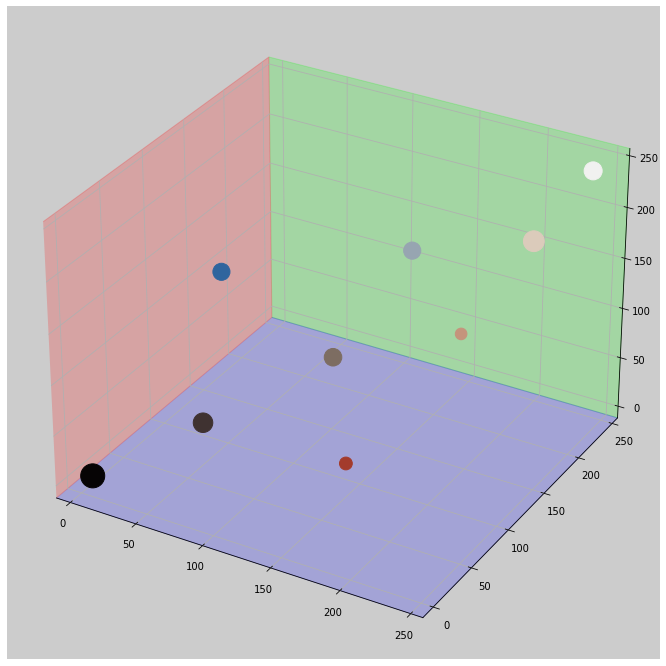

In [18]:
fig = plt.figure(figsize = (15, 12))
ax = plt.axes(projection ="3d")
ax.scatter3D(cc[:, 0], cc[:, 1], cc[:, 2], color=cc/255, s=10*np.sqrt(y[ii]), depthshade=False)
ax.w_xaxis.set_pane_color((1, 0, 0, 0.2))
ax.w_yaxis.set_pane_color((0, 1, 0, 0.2))
ax.w_zaxis.set_pane_color((0, 0, 1, 0.2))
ax.set_facecolor((0.8, 0.8, 0.8))

fig.savefig("results/3d_plot.jpg")

In [19]:
import seaborn as sns

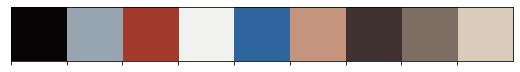

In [20]:
color_centers=[]
for col in cc:
    color_centers.append(mpl.colors.to_hex(col/255))
sns.palplot(sns.color_palette(color_centers))

plt.savefig("results/palette.jpg")